In [1]:
import pandas as pd
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sns.set_context('talk')

In [3]:
metadata = pd.read_table('../tables/baltic_transect_2014/metadata.tsv')

In [4]:
metadata.index = metadata.Comment

In [5]:
metadata[['Salinity','Sampling depth']]

,Salinity,Sampling depth
Comment,,
P1994_116,"8,325","2,794"
P1994_117,"14,969","12,707"
P1994_118,"16,415","19,302"
P1994_101,"28,05","1,762"
P1994_102,"34,914","80,121"
P1994_103,"35,081","241,725"
P1994_110,"14,526","2,863"
P1994_111,"17,613","11,444"
P1994_112,"31,943","20,763"


In [6]:
metadata['Sampling depth'] = metadata['Sampling depth'].apply(lambda x: float(x.replace(',','.')))

In [7]:
metadata['Salinity'] = metadata['Salinity'].apply(lambda x: float(x.replace(',','.')))

In [8]:
surface_samples = list(metadata[metadata['Sampling depth'] < 4].sort_values('Salinity').Comment.values)

In [9]:
surface_samples

['P1994_107',
 'P1994_125',
 'P1994_122',
 'P1994_104',
 'P1994_128',
 'P1994_119',
 'P1994_116',
 'P1994_113',
 'P1994_110',
 'P1994_101']

In [10]:
metadata.ix[surface_samples][['Salinity','Sampling depth']]

/Users/johannesalneberg/anaconda/envs/BARM_analysis/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


,Salinity,Sampling depth
Comment,,
P1994_107,2.442,1.769
P1994_125,5.456,2.362
P1994_122,6.742,1.909
P1994_104,6.744,1.420
P1994_128,7.050,2.961
P1994_119,7.577,2.999
P1994_116,8.325,2.794
P1994_113,10.280,1.749
P1994_110,14.526,2.863


In [11]:
df = pd.read_table('../tables/baltic_transect_2014/taxonomy/tax_table_class.tsv')

In [12]:
df['superkingdom'] = df['taxonomy'].apply(lambda x: x.split(';')[0])
# We're only looking at the prokaryotes
df = df[df['superkingdom'].isin(['Archea', 'Bacteria'])]
df['phylum'] = df['taxonomy'].apply(lambda x: x.split(';')[1])
df['class'] = df['taxonomy'].apply(lambda x: x.split(';')[2])

In [13]:
val_cols = list(df.columns)
val_cols.remove('taxonomy')
val_cols.remove('nr_of_genes')
val_cols.remove('gene_length')
val_cols.remove('superkingdom')
val_cols.remove('phylum')
val_cols.remove('class')

In [14]:
df['total_count'] = df[surface_samples].sum(axis=1)

In [15]:
df.sort_values('total_count')

,taxonomy,nr_of_genes,gene_length,P1994_101,P1994_102,P1994_103,P1994_104,P1994_105,P1994_106,P1994_107,...,P1994_125,P1994_126,P1994_127,P1994_128,P1994_129,P1994_130,superkingdom,phylum,class,total_count
126,Bacteria;Candidatus Curtissbacteria;Candidatus...,2,1380,0.000000,4.043234,0.000000,0.000000,0.000000,0.072559,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.069188,Bacteria,Candidatus Curtissbacteria,Candidatus Curtissbacteria bacterium RIFCSPHIG...,0.000000
413,Bacteria;Candidatus Shapirobacteria;Candidatus...,4,2262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.113013,0.000000,0.000000,0.000000,0.000000,Bacteria,Candidatus Shapirobacteria,Candidatus Shapirobacteria bacterium RBG_13_44...,0.000000
160,Bacteria;Candidatus Falkowbacteria;Candidatus ...,1,201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Bacteria,Candidatus Falkowbacteria,Candidatus Falkowbacteria bacterium RIFOXYA2_F...,0.000000
410,Bacteria;Candidatus Schekmanbacteria;Candidatu...,2,996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Bacteria,Candidatus Schekmanbacteria,Candidatus Schekmanbacteria bacterium RIFCSPLO...,0.000000
278,Bacteria;Candidatus Magasanikbacteria;Candidat...,3,1086,0.000000,0.000000,0.000000,0.000000,0.000000,0.361880,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Bacteria,Candidatus Magasanikbacteria,Candidatus Magasanikbacteria bacterium RIFCSPH...,0.000000
477,Bacteria;Candidatus Wildermuthbacteria;Candida...,2,1104,0.000000,4.001580,1.344513,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Bacteria,Candidatus Wildermuthbacteria,Candidatus Wildermuthbacteria bacterium RIFCSP...,0.000000
144,Bacteria;Candidatus Doudnabacteria;Candidatus ...,2,549,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.154590,0.267459,Bacteria,Candidatus Doudnabacteria,Candidatus Doudnabacteria bacterium RIFCSPHIGH...,0.000000
143,Bacteria;Candidatus Doudnabacteria;Candidatus ...,1,1542,0.000000,0.048955,0.000000,0.000000,0.000000,0.226993,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.034863,Bacteria,Candidatus Doudnabacteria,Candidatus Doudnabacteria bacterium RIFCSPHIGH...,0.000000
481,Bacteria;Candidatus Woesebacteria;Candidatus W...,6,1965,0.000000,0.000000,0.000000,0.000000,0.000000,0.166678,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Bacteria,Candidatus Woesebacteria,Candidatus Woesebacteria bacterium GW2011_GWA1...,0.000000
136,Bacteria;Candidatus Daviesbacteria;Candidatus ...,2,942,0.000000,0.138257,0.000000,0.000000,0.000000,0.190621,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.113819,0.000000,Bacteria,Candidatus Daviesbacteria,Candidatus Daviesbacteria bacterium RIFCSPLOWO...,0.000000


In [16]:
protbac_df = df[df['phylum'] == 'Proteobacteria'].groupby('class').sum().sort_values('total_count')
protbac_df = protbac_df[protbac_df['total_count'] > 2000]

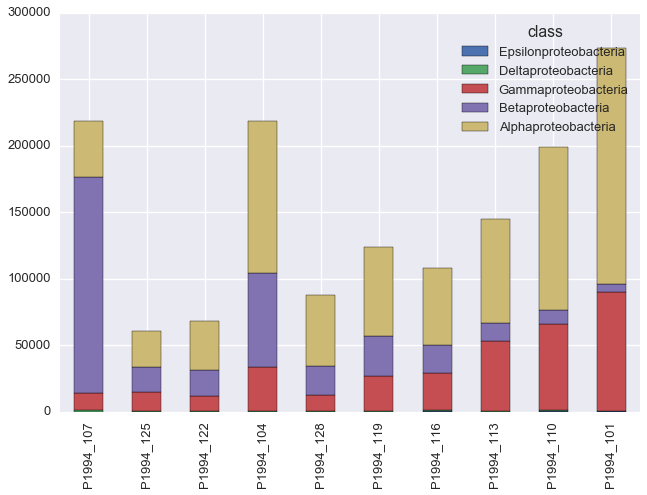

In [17]:
protbac_df[surface_samples].T.plot.bar(stacked=True)

In [18]:
colors_hex = ['#ffbf80', '#ffff99', '#ff8000', '#b3ff8c', '#33ff00','#ffff33', '#a6edff', '#1ab3ff',
         '#ccbfff', '#664dff', '#ff99bf', '#e61a33', '#000000']

In [19]:
colors_hex_original = ['#ffbf80', '#ff8000', '#ffff99', '#ffff33', '#b3ff8c', '#33ff00', '#a6edff', '#1ab3ff',
         '#ccbfff', '#664dff', '#ff99bf', '#e61a33', '#000000']

In [20]:
import matplotlib.colors as colors

In [21]:
rgb_colors = [colors.hex2color(x) for x in colors_hex]
rgb_colors_original = [colors.hex2color(x) for x in colors_hex_original]

In [22]:
phylum_df = df[df['phylum'] != 'Proteobacteria'].groupby('phylum').sum().sort_values('total_count')

In [23]:
phylum_df

,nr_of_genes,gene_length,P1994_101,P1994_102,P1994_103,P1994_104,P1994_105,P1994_106,P1994_107,P1994_108,...,P1994_122,P1994_123,P1994_124,P1994_125,P1994_126,P1994_127,P1994_128,P1994_129,P1994_130,total_count
phylum,,,,,,,,,,,,,,,,,,,,,
Candidatus Jacksonbacteria,3,837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.119769,0.000000,0.000000,0.000000,0.000000
Candidatus Woykebacteria,4,897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.234284,0.000000,0.176651,0.000000,0.000000,0.000000,0.000000,0.000000
Candidatus Microgenomates,4,1977,0.000000,0.000000,0.000000,0.000000,0.000000,0.227575,0.000000,0.000000,...,0.000000,0.000000,0.264057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Candidatus Wallbacteria,4,1692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.083004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Candidatus Fischerbacteria,18,13458,0.000000,0.157267,0.194399,0.000000,0.000000,2.586981,0.000000,0.000000,...,0.000000,0.000000,21.255186,0.000000,0.000000,0.208076,0.000000,0.413474,0.564993,0.000000
candidate division KD3-62,2,873,0.000000,0.000000,0.000000,0.000000,0.182369,0.409106,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Candidatus Chisholmbacteria,1,1314,0.000000,0.000000,0.000000,0.000000,0.000000,0.099893,0.000000,0.000000,...,0.000000,0.000000,0.133603,0.000000,0.000000,0.000000,0.000000,0.000000,0.163651,0.034470
Candidatus Kerfeldbacteria,7,2205,0.000000,0.147151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.562312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040584
Candidatus Acetothermia,3,1821,0.000000,0.000000,0.000000,0.000000,0.000000,0.494470,0.000000,0.000000,...,0.000000,0.000000,0.617990,0.110773,0.000000,0.000000,0.000000,0.000000,0.000000,0.110773


In [24]:
normalized_plot_df = phylum_df.append(protbac_df).sort_values('total_count', ascending=False)
normalized_plot_df = normalized_plot_df[surface_samples].divide(df[surface_samples].sum(),axis=1)

In [25]:
final_phylums = ['Actinobacteria', 'Bacteroidetes', 'Cyanobacteria', 'Verrucomicrobia', 'Firmicutes', 'Planctomycetes', 'Proteobacteria']

In [26]:
other_series = df[~df['phylum'].isin(final_phylums)][surface_samples].sum().divide(df[surface_samples].sum())

In [27]:
final_prot_class = ['Alphaproteobacteria','Betaproteobacteria','Gammaproteobacteria', 'Epsilonproteobacteria', 'Deltaproteobacteria','Proteobacteria']

In [28]:
other_prot_series = df[(df['phylum'] == 'Proteobacteria') & ~(df['class'].isin(final_prot_class))][surface_samples].sum().divide(df[surface_samples].sum())

In [29]:
normalized_plot_df = normalized_plot_df.append(pd.DataFrame({'Other': other_series, 'Other Proteobacteria': other_prot_series}).T)

In [30]:
normalized_plot_df

,P1994_107,P1994_125,P1994_122,P1994_104,P1994_128,P1994_119,P1994_116,P1994_113,P1994_110,P1994_101
Alphaproteobacteria,1.021379e-01,1.101597e-01,1.642897e-01,2.462910e-01,2.445946e-01,2.070125e-01,1.947488e-01,2.773709e-01,3.194491e-01,3.719450e-01
Bacteroidetes,9.428023e-02,6.778700e-02,1.894860e-01,1.198784e-01,7.735960e-02,2.371706e-01,1.852890e-01,2.303769e-01,2.658343e-01,2.436347e-01
Cyanobacteria,2.320557e-02,2.779503e-01,2.972091e-01,1.974014e-01,3.056822e-01,2.341910e-01,2.220886e-01,7.165973e-02,5.801761e-02,1.001270e-01
Actinobacteria,2.712115e-01,2.769400e-01,1.903676e-01,1.999956e-01,1.989393e-01,1.377130e-01,1.894654e-01,1.234512e-01,5.452909e-02,1.826286e-02
Betaproteobacteria,3.950256e-01,8.030754e-02,8.876414e-02,1.512466e-01,1.010070e-01,9.126927e-02,7.298474e-02,4.808401e-02,2.818334e-02,1.268519e-02
Gammaproteobacteria,3.118086e-02,5.686454e-02,4.946517e-02,7.108617e-02,5.631469e-02,8.143372e-02,9.478327e-02,1.841697e-01,1.683129e-01,1.878484e-01
Verrucomicrobia,3.739768e-02,8.467913e-02,1.000179e-02,4.589234e-03,7.066202e-03,3.784290e-03,1.880202e-02,3.615478e-02,2.965325e-02,4.703877e-02
Planctomycetes,1.476931e-02,2.941885e-02,1.802906e-03,4.195455e-03,1.513337e-03,1.101540e-03,5.755271e-03,1.775103e-02,6.522971e-02,1.063551e-02
Deltaproteobacteria,2.308872e-03,3.148813e-03,2.011422e-03,1.827163e-03,3.018364e-03,1.919509e-03,2.909407e-03,2.799189e-03,2.396841e-03,1.221118e-03
Gemmatimonadetes,1.203466e-02,2.649171e-04,2.050792e-04,1.052695e-04,2.682891e-04,1.680231e-04,2.829987e-04,2.665112e-04,1.673999e-04,1.387935e-04


In [31]:
normalized_plot_df.ix[['Alphaproteobacteria', 'Actinobacteria', 'Bacteroidetes', 'Gammaproteobacteria', 
                       'Cyanobacteria', 'Betaproteobacteria', 'Verrucomicrobia', 'Firmicutes', 
                       'Planctomycetes', 'Epsilonproteobacteria', 'Other Proteobacteria',
                       'Deltaproteobacteria', 'Other']]

/Users/johannesalneberg/anaconda/envs/BARM_analysis/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


,P1994_107,P1994_125,P1994_122,P1994_104,P1994_128,P1994_119,P1994_116,P1994_113,P1994_110,P1994_101
Alphaproteobacteria,0.102138,0.110160,0.164290,0.246291,0.244595,0.207013,0.194749,0.277371,0.319449,0.371945
Actinobacteria,0.271212,0.276940,0.190368,0.199996,0.198939,0.137713,0.189465,0.123451,0.054529,0.018263
Bacteroidetes,0.094280,0.067787,0.189486,0.119878,0.077360,0.237171,0.185289,0.230377,0.265834,0.243635
Gammaproteobacteria,0.031181,0.056865,0.049465,0.071086,0.056315,0.081434,0.094783,0.184170,0.168313,0.187848
Cyanobacteria,0.023206,0.277950,0.297209,0.197401,0.305682,0.234191,0.222089,0.071660,0.058018,0.100127
Betaproteobacteria,0.395026,0.080308,0.088764,0.151247,0.101007,0.091269,0.072985,0.048084,0.028183,0.012685
Verrucomicrobia,0.037398,0.084679,0.010002,0.004589,0.007066,0.003784,0.018802,0.036155,0.029653,0.047039
Firmicutes,0.000965,0.001633,0.000786,0.000320,0.000570,0.000561,0.000852,0.000879,0.000763,0.000444
Planctomycetes,0.014769,0.029419,0.001803,0.004195,0.001513,0.001102,0.005755,0.017751,0.065230,0.010636
Epsilonproteobacteria,0.000442,0.000438,0.000634,0.000506,0.000168,0.000584,0.001447,0.000730,0.000907,0.000748


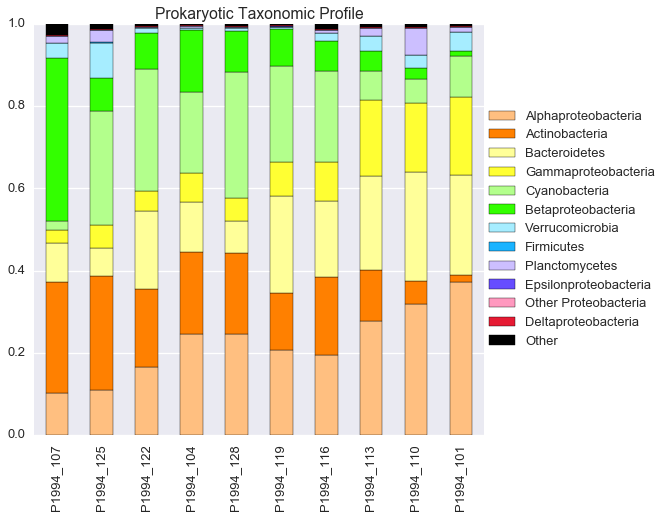

In [35]:
ax = normalized_plot_df.ix[['Alphaproteobacteria', 'Actinobacteria', 'Bacteroidetes', 'Gammaproteobacteria', 
                       'Cyanobacteria', 'Betaproteobacteria', 'Verrucomicrobia', 'Firmicutes', 
                       'Planctomycetes', 'Epsilonproteobacteria', 'Other Proteobacteria',
                       'Deltaproteobacteria', 'Other']].T.plot.bar(stacked=True, color=rgb_colors_original)

# Reverse order of legend labels
#leg = ax.get_legend()
#patches = leg.get_patches()
#labels = [x.get_text() for x in leg.get_texts()]
ax.legend(loc=(1.0, 0.2), ncol=1)
ax.set_ylim(0, 1.0)
ax.set_title('Prokaryotic Taxonomic Profile')
fig = ax.figure
#fig.get_size_inches()
fig.set_size_inches([10.4, 8.15])
ax.set_position([0.1,0.15,0.6,0.7])
plt.savefig('prokaryotic_taxonomy.pdf')

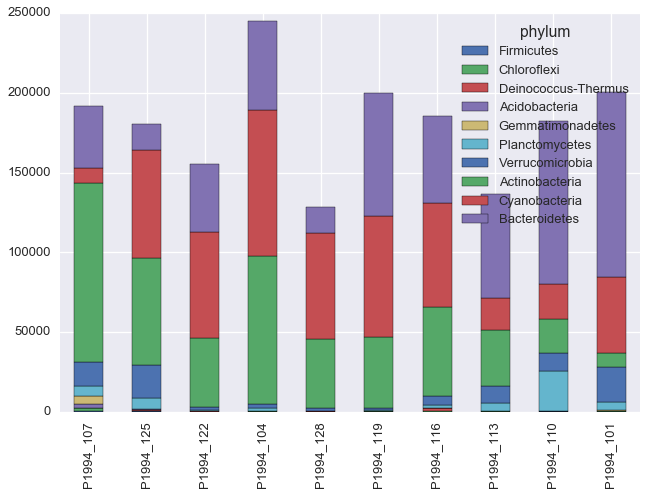

In [33]:
df[df['phylum'] != 'Proteobacteria'].groupby('phylum').sum().sort_values('total_count').tail(10)[surface_samples].T.plot.bar(stacked=True)

In [34]:
df[df['phylum'] != 'Proteobacteria'].groupby('phylum').sum().sort_values('total_count').tail(10)

,nr_of_genes,gene_length,P1994_101,P1994_102,P1994_103,P1994_104,P1994_105,P1994_106,P1994_107,P1994_108,...,P1994_122,P1994_123,P1994_124,P1994_125,P1994_126,P1994_127,P1994_128,P1994_129,P1994_130,total_count
phylum,,,,,,,,,,,,,,,,,,,,,
Firmicutes,5942,3976803,211.368560,1228.924838,804.673377,148.758240,375.014914,1031.401503,397.740982,480.259441,...,176.391954,463.524000,1017.124496,395.405730,567.591050,376.569135,123.613724,640.235743,631.644200,2427.253816
Chloroflexi,15478,11327334,104.203954,1226.881133,482.214449,203.508597,2891.452926,4395.534258,1799.946894,2486.689895,...,104.073473,5306.817846,3341.530565,501.360248,845.402664,858.537587,130.604958,1658.192023,1532.714097,3343.100600
Deinococcus-Thermus,1583,918867,408.032132,636.406508,1038.669995,280.530269,605.066210,227.129376,160.077971,305.079870,...,277.256440,5297.800131,767.462728,363.446233,496.601051,168.580452,91.901564,723.062488,672.805829,3920.119219
Acidobacteria,17803,14432805,167.726297,1260.144008,749.142017,135.007700,137.197671,2044.614705,2547.161829,12984.187662,...,112.429994,584.323628,428.661256,516.245695,2918.676086,3783.195606,145.997881,2197.763522,1824.387183,4479.314733
Gemmatimonadetes,7519,5728956,66.039786,2185.702717,879.659179,48.902450,75.895720,1755.556260,4961.518902,1438.068300,...,46.042542,179.319120,299.901743,64.155517,121.666424,454.665338,58.219706,892.031873,795.136957,5522.278795
Planctomycetes,62730,55408068,5060.519859,12883.360289,12155.269679,1948.978245,748.175854,21377.618378,6088.931476,14155.118116,...,404.772332,14918.885965,6647.946863,7124.421776,11946.718297,6357.246519,328.399504,37259.162108,33024.062567,53029.975957
Verrucomicrobia,76984,62507592,22381.677110,9649.020321,16149.553024,2131.905945,2213.744638,6293.263784,15417.912364,18965.151937,...,2245.513753,5990.895032,3097.744300,20506.917104,38068.190934,18344.005560,1533.391269,6460.984582,6011.241965,92582.454442
Actinobacteria,146786,108186654,8689.711837,17063.988311,13188.572006,92906.980952,39455.306215,28519.699048,111812.183322,85790.133185,...,42739.641303,182103.144866,33264.371382,67067.119881,156454.345660,78951.392879,43170.546703,102465.983655,98412.901417,522656.009250
Cyanobacteria,102983,68722056,47641.766113,54525.927244,30566.280199,91701.849836,7555.533117,3365.345844,9566.944485,8078.479646,...,66726.746977,5560.620500,3779.289162,67311.784466,17722.832463,6755.904072,66334.149411,5105.069443,5572.943204,533096.167240
